In [1]:
from __future__ import division
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

# 目标
- 计算和绘制二维直方图。

# 1. 介绍
在前面的教程中，介绍了如何绘制一维直方图。之所以被称为一维直方图，是因为仅仅考虑了一个特征（即像素的亮度值）。在二维直方图中，要考虑两个特征。通常用于计算彩色图像的色调和饱和度两个特征。

在OpenCV中提供了一个例子来计算彩色直方图（源码的“samples/python/color_histogram.py”）。下面介绍如何创建一个彩色直方图，这对于理解之后的一些话题（例如直方图反向投影）非常有用。

# 2. 用OpenCV计算二维直方图
可以使用相同的函数**cv2.calcHist()**来计算。对于彩色直方图，首先需要将图像由BGR转换到HSV空间（在一维直方图中，将图像由BGR转换为GRAY）。对于二维直方图，参数进行如下调整：
- **channels = [0, 1]** - 因为需要计算Hue和Saturation两个特征。
- **bins = [180, 256]** - 表示Hue需要180个BINS，而Saturation需要256个BINS。
- **range = [0, 180, 0, 256]** - Hue的值介于0到180之间，Saturation的值介于0到256之间。

In [2]:
img = cv2.imread('../data/home.jpg')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

hist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])

# 3. 用Numpy计算二维直方图
Numpy提供了专用函数**np.histogram2d()**函数来计算二维直方图。（对于一维直方图，使用**np.histogram()**函数）。

In [3]:
img = cv2.imread('../data/home.jpg')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h = hsv[:, :, 0]
s = hsv[:, :, 1]
hist, xbins, ybins = np.histogram2d(h.ravel(), s.ravel(), [180, 256], [[0, 180], [0, 256]])

第一个参数是Hue通道，第二个参数是Saturation通道，第三个参数是每个通道的BINS，第四个参数是两个通道的取值范围。

下面将讨论如何绘制颜色直方图。

# 4. 绘制二维直方图
## 4.1 使用cv2.imshow()
由于得到的结果是一个180x256的二维数组，因此可以直接用**cv2.imshow()**来显示。但是这样显示是一幅灰度图像，从中较难得到颜色信息，除非你知道不同颜色的Hue值。

## 4.2 使用Matplotlib
可以用**matplotlib.pyplot.imshow()**函数来绘制不同颜色的二维直方图，该方法可以更好的表示不同像素亮度。但是同样无法给出充足的颜色信息。之所以推荐这种方法是因为该方法简单而且比第一种方法效果更好。

> **注意**  
> 在使用该函数时，插值（interpolation）标志设置为**nearest**会有较好的结果。

(<matplotlib.axes._subplots.AxesSubplot at 0x10bc65978>,
 <matplotlib.image.AxesImage at 0x10bf58e10>)

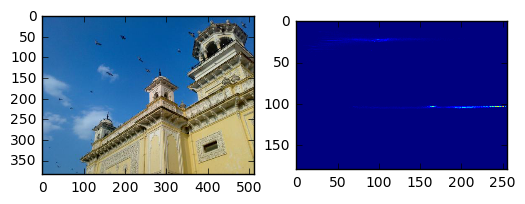

In [4]:
plt.subplot(121), plt.imshow(img[:, :, ::-1])
plt.subplot(122), plt.imshow(hist, interpolation='nearest')

上面是输入图像的彩色直方图，X轴表示Saturation，Y轴表示Hue。

在直方图中，可以看到在H = 100和S = 200位置附近有比较大的值。这个区域的值对应着蓝天。另外一个位于H=25和S=200的
峰值对应着黄色的宫殿。可以用然和图像编辑工具（例如GIMP）来验证这一点。

## 4.3 OpenCV示例风格
下面的例子中首先创建一个HSV的颜色映射图，然后将其转换为BGR图像。用图像直方图的结果乘以该颜色映射图。在此之前还可以进行一些预处理来移除孤立像素，来获得更好的结果。

(<matplotlib.axes._subplots.AxesSubplot at 0x108089e80>,
 <matplotlib.image.AxesImage at 0x118522a20>)

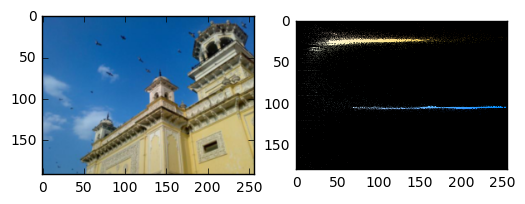

In [5]:
import numpy as np
import cv2

# 建立hsv颜色映射图
hsv_map = np.zeros((180, 256, 3), np.uint8)
h, s = np.indices(hsv_map.shape[:2])
hsv_map[:, :, 0] = h
hsv_map[:, :, 1] = s
hsv_map[:, :, 2] = 255
hsv_map = cv2.cvtColor(hsv_map, cv2.COLOR_HSV2BGR)

img = cv2.imread('../data/home.jpg', cv2.IMREAD_COLOR)
img = cv2.pyrDown(img)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 去除较暗的元素
dark = hsv[:, :, 2] < 32
hsv[dark] = 0

hist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])

# 截断直方图中较大的元素
hist = np.clip(hist * 0.05 , 0, 1)
vis = hsv_map * hist[:, :, np.newaxis] / 255.0

plt.subplot(121), plt.imshow(img[:, :, ::-1])
plt.subplot(122), plt.imshow(vis[:, :, ::-1], interpolation='none')

在上面的直方图中，可以看到颜色的表示，蓝色和黄色的区域。